# Working on MNIST dataset 
1. loading the mnist data using tensorflow.keras.datasets


In [63]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2. calculating random image distance of each class from each class.

In [64]:
import numpy as np

# Choose one random image from each class
images = []
for cls in range(10):
  idx = np.random.choice(np.where(y_train == cls)[0])
  images.append(x_train[idx])

# Calculate L1 distance to every other class
distances = np.zeros((10, 10))
for i, img1 in enumerate(images):
  for j, img2 in enumerate(images):
    distances[i, j] = np.sum(np.abs(img1 - img2))

# Display results
print("L1 Distances between Random Images from Each Class (MNIST):")
print(distances)

L1 Distances between Random Images from Each Class (MNIST):
[[    0. 31951. 32321. 27044. 30554. 32758. 24788. 30614. 28851. 34279.]
 [21553.     0. 22642. 18645. 16779. 21799. 17413. 15815. 17380. 18712.]
 [35519. 39822.     0. 35939. 39961. 39605. 31379. 38741. 38002. 42406.]
 [37212. 38955. 40093.     0. 41398. 35410. 30768. 33522. 31759. 40771.]
 [22438. 18293. 27367. 24650.     0. 27548. 24186. 19516. 22617. 24461.]
 [30730. 32473. 36171. 31406. 34404.     0. 30174. 32416. 28093. 36337.]
 [35372. 40699. 39533. 39632. 37254. 44578.     0. 40130. 38623. 38931.]
 [21866. 16953. 26027. 23310. 21700. 23392. 20542.     0. 19997. 20817.]
 [28749. 26396. 33422. 28657. 30887. 31043. 26401. 28643.     0. 31540.]
 [29209. 27112. 29530. 27069. 27763. 25359. 26093. 23215. 25548.     0.]]


3. Loading the cifar-10 dataset from tensorflow

In [65]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

4. Calculating distance of random image from each class to each class.

In [66]:
# Choose one random image from each class
images = []
for cls in range(10):
  idx = np.random.choice(np.where(y_train == cls)[0])
  images.append(x_train[idx])

# Calculate L1 distance to every other class
distances = np.zeros((10, 10))
for i, img1 in enumerate(images):
  for j, img2 in enumerate(images):
    distances[i, j] = np.sum(np.abs(img1 - img2))

# Display results
print("L1 Distances between Random Images from Each Class (CIFAR10):")
print(distances)

L1 Distances between Random Images from Each Class (CIFAR10):
[[     0. 383696. 411811. 416464. 358742. 374720. 375425. 370240. 425550.
  407206.]
 [400688.      0. 386003. 347648. 373894. 364528. 364977. 377712. 345982.
  325846.]
 [371037. 398381.      0. 400941. 313523. 370461. 276190. 312989. 334763.
  421123.]
 [366384. 437504. 382931.      0. 360326. 372464. 351665. 367216. 376702.
  372950.]
 [421290. 408698. 468045. 422522.      0. 375914. 405291. 360682. 402936.
  467280.]
 [408128. 419344. 411619. 412176. 406166.      0. 452801. 425344. 368782.
  455910.]
 [404607. 416847. 504610. 428111. 374741. 331583.      0. 360383. 365517.
  424485.]
 [414144. 406928. 471395. 416912. 423190. 357504. 421953.      0. 403726.
  427878.]
 [356530. 438402. 446805. 406402. 374792. 413298. 414003. 379890.      0.
  454232.]
 [377434. 400682. 362237. 411690. 315056. 326938. 358107. 356762. 329896.
       0.]]


5. Finding out the nearest neighbor for each of the random image based on L1 distance.  
 Image from different class looks similar or gets same class label is because when L1-distance performed, it calculates the difference between each pixel of the testing image and the image class. Sometimes the handwritten digits can be as deformed and this can make the difference between pixels same as other image class, which inturn makes the algorithm decide it belongs to other class.

 For example, the digits 1 and 2 can be confused when written by hand if the writer does a sharper curve while writing 2, this can be mistaken with 1 as the pixel difference between each pixel will be obtained minimum. So, it can be misjudged between 1 and 2.

In [67]:
closest_neighbors = []
for i, img in enumerate(images):
  distances = []
  for j, other_img in enumerate(images):
    if i != j:
      distance = np.sum(np.abs(img - other_img))
      distances.append((distance, j))
  closest_neighbors.append(min(distances, key=lambda x: x[0])[1])

# Print the closest neighboring class for each image class
print("Closest Neighboring Class (K=1) for Each Image Class:")
for i, cls in enumerate(closest_neighbors):
  print(f"Class {i}: {cls}")

Closest Neighboring Class (K=1) for Each Image Class:
Class 0: 4
Class 1: 9
Class 2: 6
Class 3: 6
Class 4: 7
Class 5: 8
Class 6: 5
Class 7: 5
Class 8: 0
Class 9: 4


6. REpeating all the steps from 1-5 with replacing the distance metric with L2-distance i.e., Euclidean distance.

L2-Distance between Random Images from each class in MNIST dataset.

In [68]:
# Choose one random image from each class (same as before)
images = []
for cls in range(10):
    idx = np.random.choice(np.where(y_train == cls)[0])
    images.append(x_train[idx])

# Calculate L2 distance to every other class
distances = np.zeros((10, 10))
for i, img1 in enumerate(images):
    for j, img2 in enumerate(images):
        distances[i, j] = np.sqrt(np.sum((img1 - img2) ** 2))  # L2 distance calculation

# Display results
print("L2 Distances between Random Images from Each Class (MNIST):")
print(distances)



L2 Distances between Random Images from Each Class (MNIST):
[[  0.         560.22406232 577.69369046 563.55656327 574.31698564
  579.8715375  560.1392684  564.31728664 563.37997834 573.19804605]
 [560.22406232   0.         580.24736105 567.19749647 589.50233248
  578.46521071 562.60732309 570.27624885 561.04188792 576.62379417]
 [577.69369046 580.24736105   0.         571.84438443 580.88553089
  574.03222906 574.77647829 567.19132574 572.16693368 558.45322096]
 [563.55656327 567.19749647 571.84438443   0.         566.28084905
  557.60469869 561.3341251  562.41088183 579.02417912 575.17475605]
 [574.31698564 589.50233248 580.88553089 566.28084905   0.
  564.20652247 575.97569393 559.61236584 554.52953032 579.8223866 ]
 [579.8715375  578.46521071 574.03222906 557.60469869 564.20652247
    0.         565.57316061 568.77324128 566.34794959 576.95493758]
 [560.1392684  562.60732309 574.77647829 561.3341251  575.97569393
  565.57316061   0.         573.67760981 565.34148972 571.82339931]
 [5

L2-Distance between random images from each class in CIFAR-10 dataset.

In [69]:
# Choose one random image from each class
images = []
for cls in range(10):
  idx = np.random.choice(np.where(y_train == cls)[0])
  images.append(x_train[idx])

# Calculate L2 distance to every other class
distances = np.zeros((10, 10))
for i, img1 in enumerate(images):
  for j, img2 in enumerate(images):
    distances[i, j] = np.sqrt(np.sum((img1 - img2)**2))

# Display results
print("L2 Distances between Random Images from Each Class (CIFAR10):")
print(distances)

L2 Distances between Random Images from Each Class (CIFAR10):
[[  0.         569.79382236 571.90820942 574.73385145 572.6281516
  576.58390543 570.57251949 570.79155565 566.45035087 567.84504929]
 [569.79382236   0.         575.51020842 565.53337656 565.44318901
  564.91415277 563.39861555 561.66538081 570.42352686 564.84422631]
 [571.90820942 575.51020842   0.         567.43634004 563.02753041
  577.02512944 567.37113074 570.58916919 586.26018115 564.8070467 ]
 [574.73385145 565.53337656 567.43634004   0.         571.9685306
  556.08452595 575.39030232 560.92245453 567.50947129 565.33087657]
 [572.6281516  565.44318901 563.02753041 571.9685306    0.
  574.25778184 568.55430699 575.07043047 579.70768496 569.51470569]
 [576.58390543 564.91415277 577.02512944 556.08452595 574.25778184
    0.         565.4644109  568.71433954 567.19220728 571.19086127]
 [570.57251949 563.39861555 567.37113074 575.39030232 568.55430699
  565.4644109    0.         560.22495482 573.70811394 569.23193867]
 [5

In [71]:
closest_neighbors = []
for i, img in enumerate(images):
  distances = []
  for j, other_img in enumerate(images):
    if i != j:
      distance = np.sqrt(np.sum((img - other_img)**2))
      distances.append((distance, j))
  closest_neighbors.append(min(distances, key=lambda x: x[0])[1])

# Print the closest neighboring class for each image class
print("Closest Neighboring Class (K=2) for Each Image Class:")
for i, cls in enumerate(closest_neighbors):
  print(f"Class {i}: {cls}")

Closest Neighboring Class (K=2) for Each Image Class:
Class 0: 8
Class 1: 7
Class 2: 4
Class 3: 5
Class 4: 2
Class 5: 3
Class 6: 7
Class 7: 6
Class 8: 7
Class 9: 7


# MNIST datasets

1. Divinding the MNIST dataset into train and test with 80% and 20% split.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2. Performing the K-Nearest neighbor algorithm with L1-distance metric and K value as 1.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

"""# Reshape the data to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
"""
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create a KNN classifier with K=5 and L1 distance
knn_l1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Fit the classifier on the training data
knn_l1.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_l1 = knn_l1.predict(X_test)

(56000, 784) (14000, 784) (56000,) (14000,)


Computing time taken by the model to perform KNN algorithm.

In [7]:
import time

# Start the timer
start_time = time.time()

# perform the algorithm
y_pred_l1 = knn_l1.predict(X_test)

# end the timer
end_time = time.time()

# Calculate the elapsed time by subtracting end_time to start_time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.2f} seconds")

Elapsed time: 848.85 seconds


4. Repeating steps 2 and 3 for k values 25, 55, and 105.

In [8]:
for k in [25, 55, 105]:
    knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_l1.fit(X_train, y_train)
    y_pred_l1 = knn_l1.predict(X_test)

    start_time = time.time()
    y_pred_l1 = knn_l1.predict(X_test)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"K={k}")
    print(f"Elapsed time: {elapsed_time:.2f} seconds")

K=25
Elapsed time: 796.19 seconds
K=55
Elapsed time: 773.98 seconds
K=105
Elapsed time: 775.18 seconds


5. Repeating steps 2,3, and 4 with L2-distance metrics.

For this step I have used a single loop with k values [5,25,55,105] which provides the answer for steps 2,3,and 4 and using L2-distance metrics.

In [ ]:
for k in [5, 25, 55, 105]:
  # Create a KNN classifier with the specified metric and K
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

  # Start timing for testing
  start_time = time.time()

  # Fit the classifier on the training data
  knn.fit(X_train, Y_train)

  # Predict labels for the test data
  y_pred = knn.predict(X_test)

  # Stop timing and calculate elapsed time
  end_time = time.time()
  elapsed_time = end_time - start_time

  print(f"K={k}, Metric={metric}, Elapsed Time: {elapsed_time:.4f} seconds")

Implementing the neural network on MNIST dataset using the given link.

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [10]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
classes= np.unique(train_labels)

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

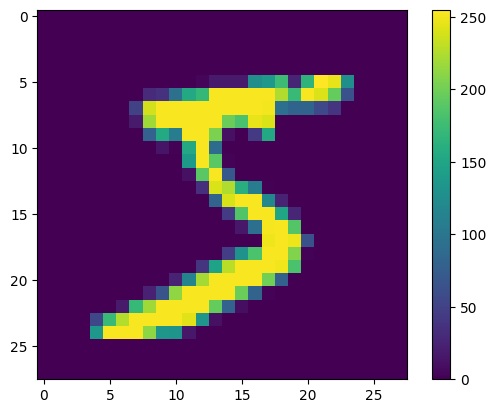

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

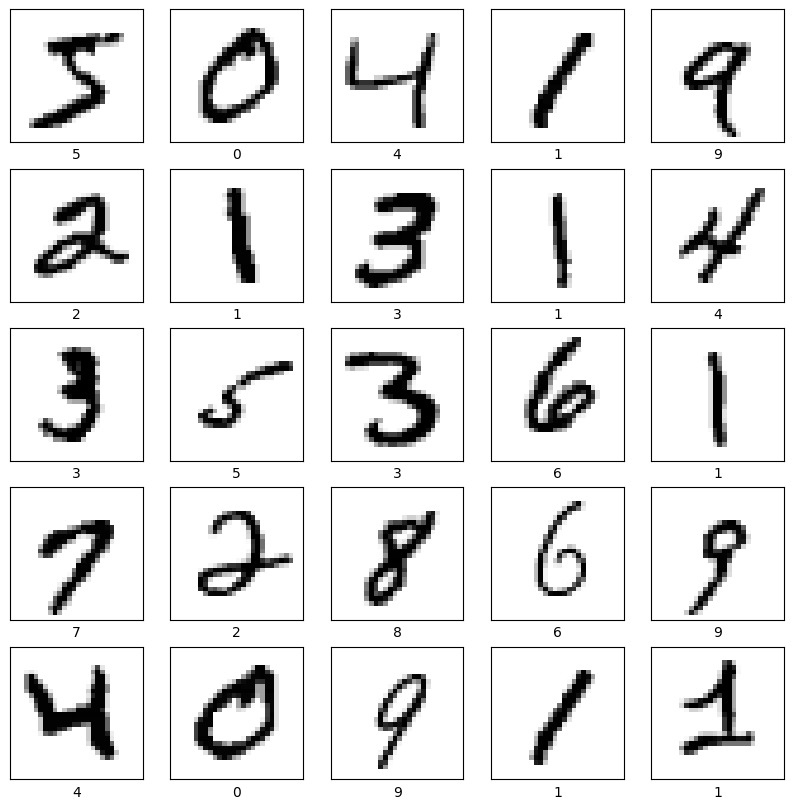

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

In [17]:
# creating a neural network with 3 layers with one hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2543 - accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1145 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0785 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0583 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0282 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0730 - accuracy: 0.9811 - 733ms/epoch - 2ms/step

Test accuracy: 0.9811000227928162


In [21]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [23]:
predictions[0]

array([6.5582097e-12, 1.5262561e-10, 2.6006466e-09, 1.4468802e-07,
       2.3621510e-16, 4.3419401e-10, 4.4185829e-18, 9.9999982e-01,
       2.2438287e-11, 1.4737818e-09], dtype=float32)

In [24]:
np.argmax(predictions[5])

1

In [25]:
test_labels[5]

1

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

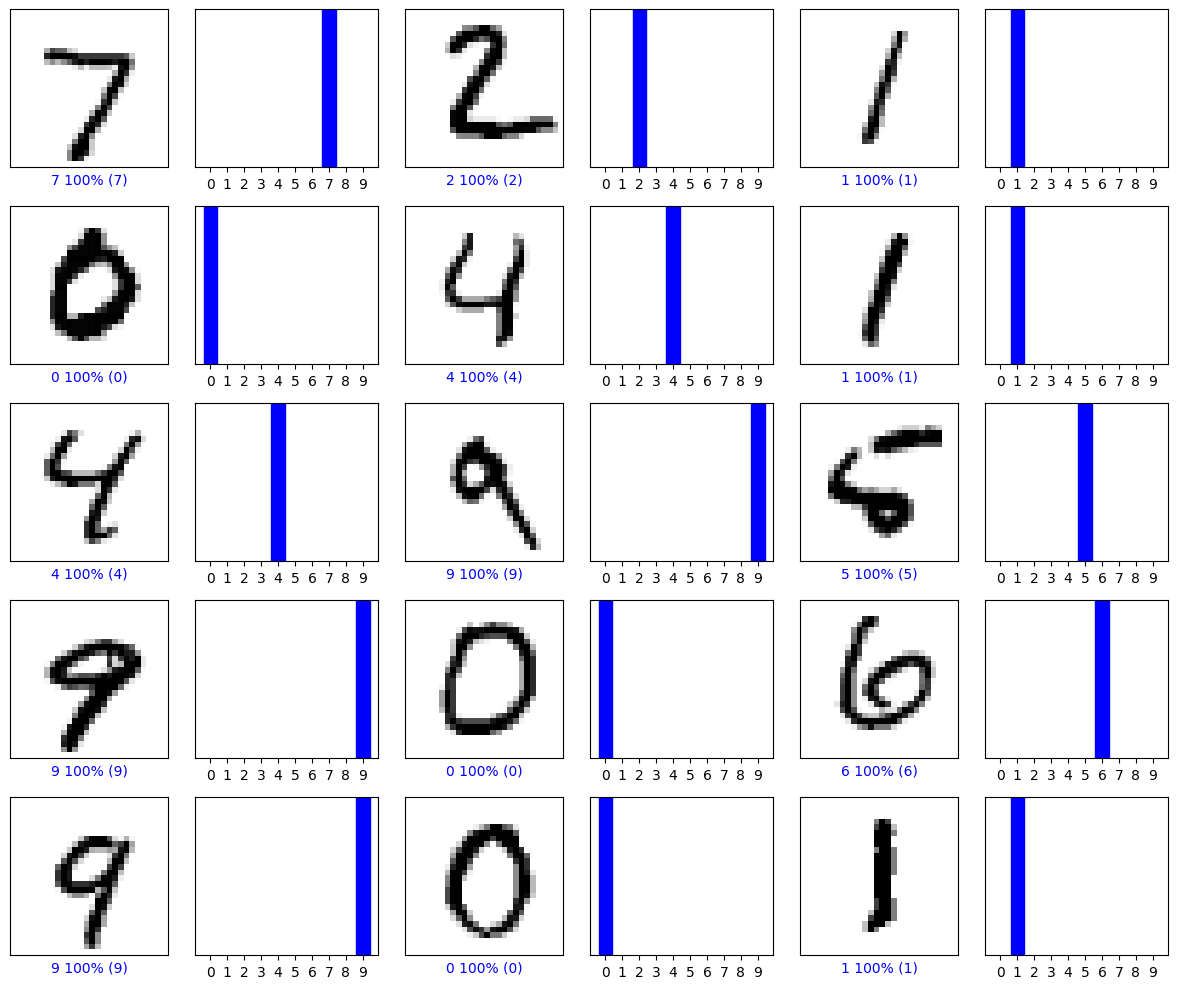

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

2. Neural network with second layer has input number of neurons i.e, 10

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5070 - accuracy: 0.8608
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.9209
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9307
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2360 - accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2253 - accuracy: 0.9363
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2167 - accuracy: 0.9390
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2116 - accuracy: 0.9401
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2069 - accuracy: 0.9414
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2021 - accuracy: 0.9420
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.198

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2204 - accuracy: 0.9364 - 786ms/epoch - 3ms/step

Test accuracy: 0.9363999962806702


In [32]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [34]:
predictions[0]

array([2.34036449e-07, 9.37650491e-09, 1.13260321e-05, 7.28249084e-04,
       9.99109337e-11, 2.21299544e-07, 4.88891408e-15, 9.99255419e-01,
       1.08762556e-07, 4.44210627e-06], dtype=float32)

In [35]:
np.argmax(predictions[5])

1

In [36]:
test_labels[5]

1

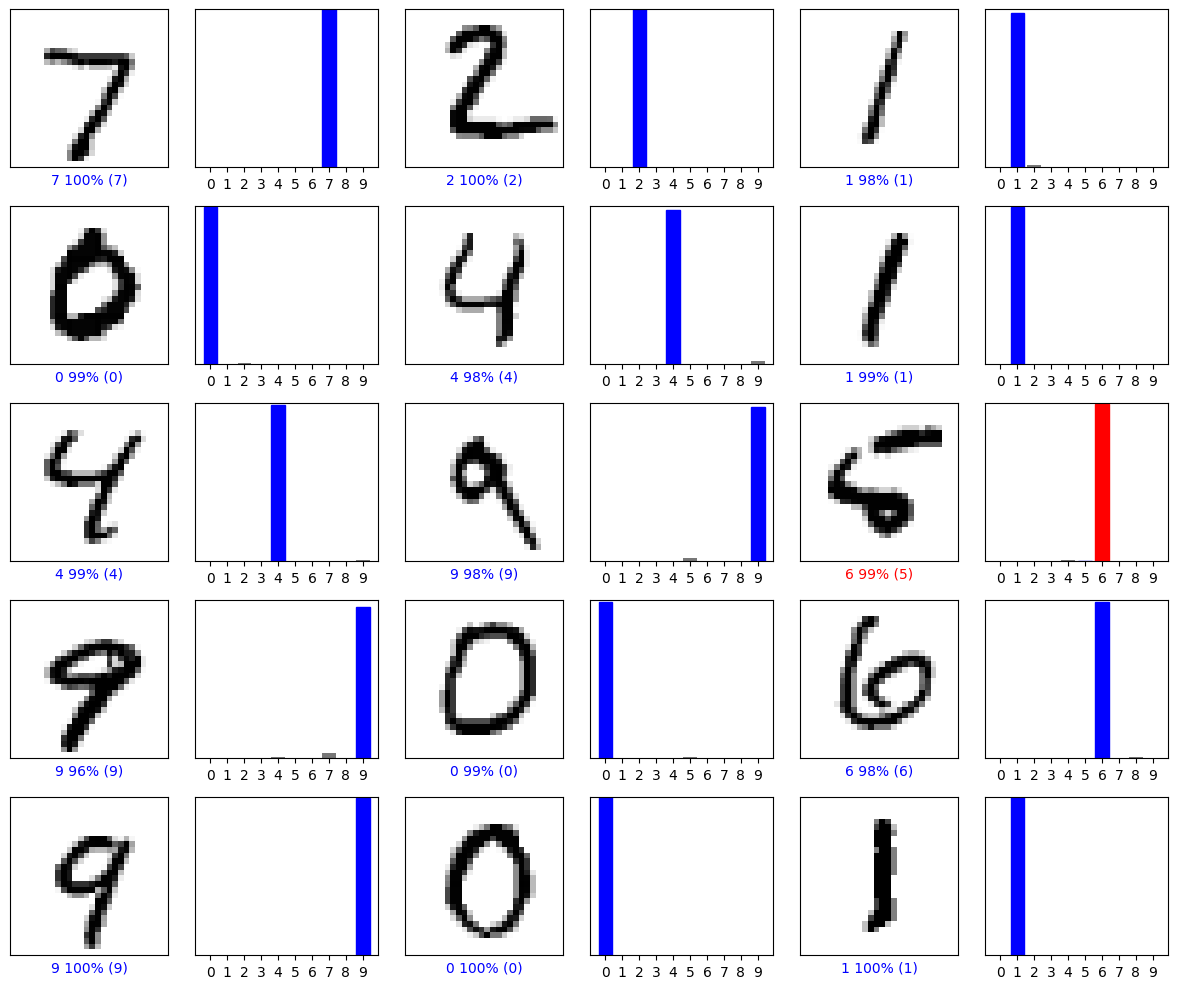

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

3. Neural network with 2nd layer having 2 times the input layer neurons i.e, 20

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4014 - accuracy: 0.8883
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2332 - accuracy: 0.9339
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1947 - accuracy: 0.9445
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1712 - accuracy: 0.9512
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1560 - accuracy: 0.9554
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1436 - accuracy: 0.9582
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9602
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1285 - accuracy: 0.9627
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1224 - accuracy: 0.9638
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.118

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1416 - accuracy: 0.9576 - 576ms/epoch - 2ms/step

Test accuracy: 0.9575999975204468


In [42]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [43]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
predictions[0]

array([5.9537579e-06, 6.4113444e-11, 1.2654734e-04, 5.8671609e-03,
       6.8219062e-09, 6.0143577e-08, 2.7656435e-15, 9.9397612e-01,
       1.2397010e-05, 1.1747970e-05], dtype=float32)

In [45]:
np.argmax(predictions[5])

1

In [46]:
test_labels[5]

1

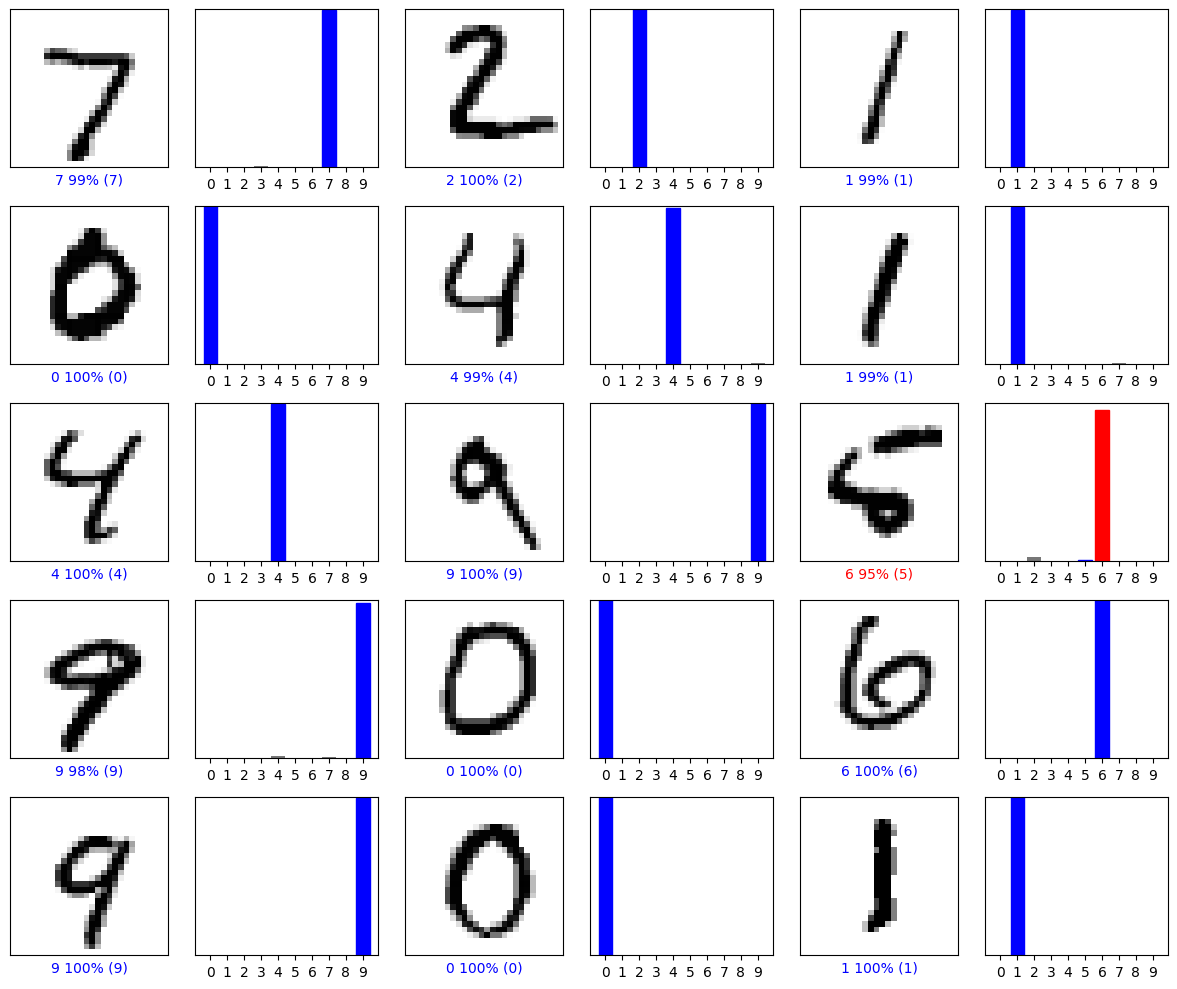

In [47]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

4. Neural network with 4 layers with random number of neurons, for this case I am going with adding 64 layers to the regular neural network

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    # adding extra layer to the model with 64 neurons
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2428 - accuracy: 0.9282
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1023 - accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0709 - accuracy: 0.9781
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0530 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0418 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0246 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss:

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0792 - accuracy: 0.9801 - 680ms/epoch - 2ms/step

Test accuracy: 0.9800999760627747


In [55]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [57]:
predictions[0]

array([2.0065172e-10, 1.1111995e-08, 4.7134794e-08, 1.0884149e-06,
       2.8421920e-10, 2.2819291e-09, 3.7873232e-15, 9.9999827e-01,
       1.1912599e-10, 6.3403735e-07], dtype=float32)

In [58]:
np.argmax(predictions[5])

1

In [59]:
test_labels[5]

1

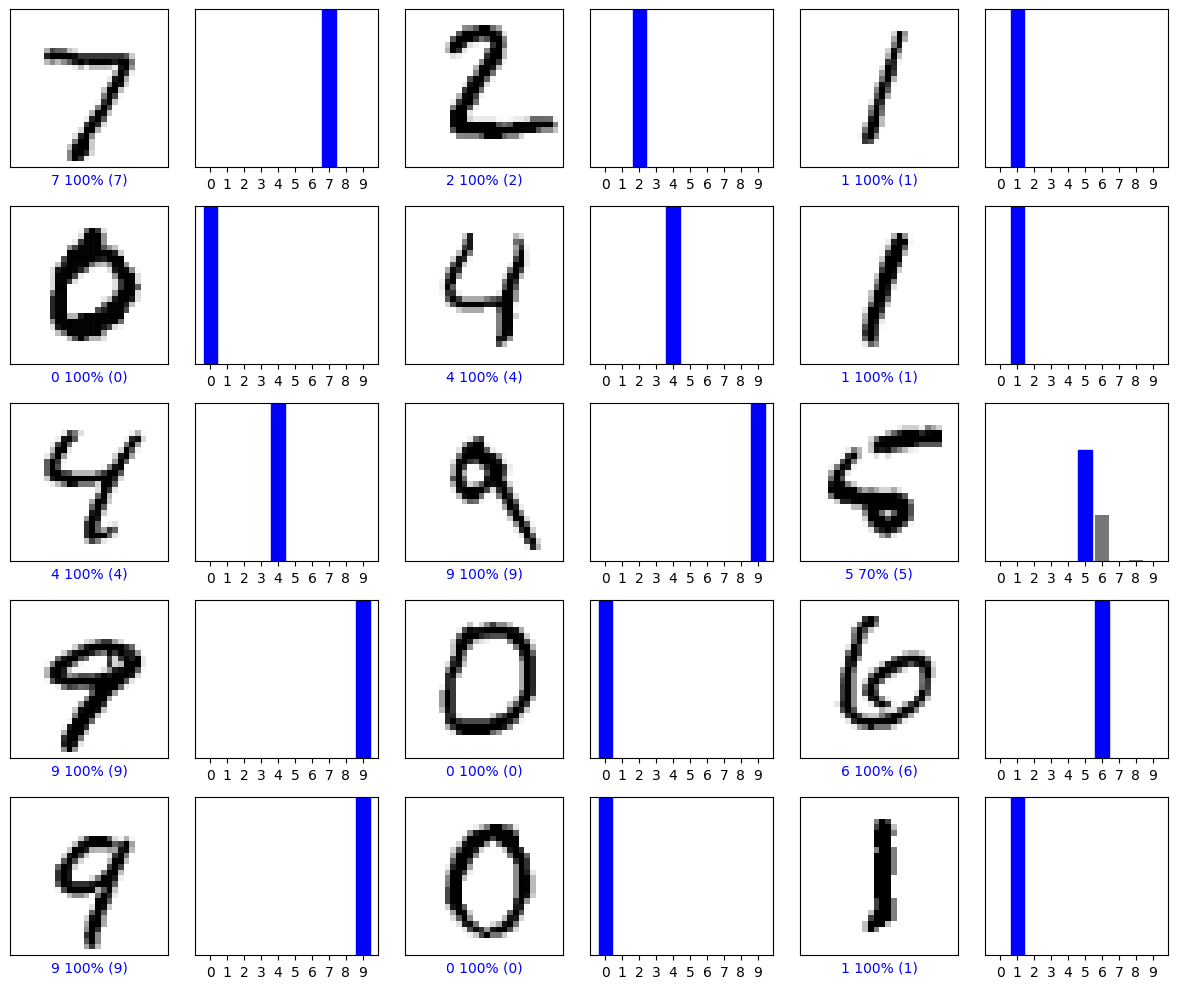

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

5. The accuracy of neural net-1 is 98.11%.

  The accuracy of neural net-2 is 93.64%.

  The accuracy of neural net-3 is 95.76%.

  The accuracy of neural net-4 is 98.01%.

  I think for our problem MNIST dataset nueral net-1 is the perfect model with atmost accuracy and does not overfit to the data.
  But in the case of neural net-4 where we used 4 layers, accuracy was 98.01%, but the model was overfitted to the dataset leading to inaccuracy in the slightly deformed test image. I think the reason for this is the dataset does not need more complex network since complex neural nets only work better on larger dataset with complex features and data noise. In our case, as the nn-1 is highly suitable for the dataset.
  
   Neural net-2 and neural net-4 does not have enough complexity to the model parameters so it lead to less accuracy and less confidence to the model. These both models works fine to regular images, if there is any irregularities in the model then it might a problem for the model to guess correctly with higher confidence.
    



# Observations

For complex datasets like MNIST and CIFAR-10, it is not correct way to use the L1 distance and L2 distance metrics to classify the images. As the results occured in the code, the accuracy will not be up to the mark. It just calculate the difference in the values of the pixels in the image and nothing more parameters comes into play. This makes it more susceptible to the misjudging an image by plainly basing on its pixel values. In our results the classes of different images are classified as they belong to a same class. So, this might not be a good model to depend on.


By implementing the KNN algorithms to the datasets takes long times to be trained and also they do not have accuracies as they depend on the L1 and L2 distances as distance metrics. These long times and low accuracies make KNN models not suitable for the MNIST and CIFAR-10 datasets.


Neural network seems to be the best option for the MNIST datset as they have higher accuracy rates and lower training times. However, it is made clear that while building a model, the parameters passing to the model play a significant difference. The model with 3 layers and hidden layer with a considerably high number of neurons made a high accuracy model with than the models with lower number of neurons in the hidden layer. When we try to increase the number of hidden layer it also does not work because the dataset becomes too simple for the neural network to work on and actually lead to overfitting. The model with 4 layers has higher accuracy to the training dataset but when any irregularities or newer type of data is passed then the model struggles and provides a low confident prediction.

1. Apply KNN for the Fashion MNIST dataset.

In [72]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import fashion_mnist


In [73]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [74]:
x_train = x_train.reshape(x_train.shape[0], -1)  # Flatten images to 2D
x_test = x_test.reshape(x_test.shape[0], -1)


In [75]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [76]:
from sklearn.metrics import accuracy_score
# KNN using SKlearn.Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# calculating the accuracy of the model using sklearn.metrics accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8554


2. The accuracies obtained from MLP using tensorflow is much higher because as we discussed earlier, the KNN are not suitable models for image classification. Sure, the testing images if they are closely matching with the training dataset are predicted comfortably, but when the images given are not matching with the training set then, the model will not predict the images with confidence. Similar to our neural network approach in question-3, the neural network is overfitted to the trainig data and provides less accuracies for the model.

